In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics as metrics
import seaborn as sns
import statsmodels.api as sm
import pylab
from scipy import stats
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.api as sms
sns.set(rc={'figure.figsize':(13,10)})
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import geohash as gh
from sklearn.cluster import KMeans 
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OrdinalEncoder, PowerTransformer

In [2]:
houses = pd.read_csv('housing.csv')

In [3]:
enc = OrdinalEncoder()

In [4]:
houses['geohash']=houses.apply(lambda x: gh.encode_uint64(x.latitude, x.longitude), axis=1)

In [5]:
# houses['geohash'] = enc.fit_transform(houses['geohash'].values.reshape(-1, 1)).reshape(1, -1)[0]

In [6]:
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geohash
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5589903327937125404
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5589903271125801103
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5589902929202988934
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5589902900647642886
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5589902900647642886
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5603230226007257009
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,5603222209074352692
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5603218665871544799
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5603194371936361335


In [7]:
houses['median_income-population-households'] = houses['median_income'] / (houses['population'] / houses['households'])
houses['population-households'] =  houses['population'] / houses['households']

In [8]:
# houses = houses[houses['median_house_value'] != 500001]

In [9]:
houses = houses.drop(columns=['median_income'])

In [10]:
aux = houses.copy()
# houses[houses['housing_median_age'] <=10]
aux.loc[aux['housing_median_age'] <= 10, 'house_old'] = 1
aux.loc[aux['housing_median_age'] > 10, 'house_old'] = 2
aux.loc[aux['housing_median_age'] > 20, 'house_old'] = 3
aux.loc[aux['housing_median_age'] > 30, 'house_old'] = 4
aux.loc[aux['housing_median_age'] > 40, 'house_old'] = 5
# aux.loc[aux['housing_median_age'] > 50, 'house_old'] = 5

aux['house_old'] = aux['house_old'].astype('int64')
# houses['housing_median_age'] = aux['house_old'].astype('int64')

In [11]:
# aux = houses.copy()
# # houses[houses['housing_median_age'] <=10]
# aux.loc[aux['housing_median_age'] <= 5, 'house_old'] = 0
# aux.loc[aux['housing_median_age'] > 5, 'house_old'] = 2
# aux.loc[aux['housing_median_age'] > 10, 'house_old'] = 2
# aux.loc[aux['housing_median_age'] > 15, 'house_old'] = 3
# aux.loc[aux['housing_median_age'] > 20, 'house_old'] = 4
# aux.loc[aux['housing_median_age'] > 25, 'house_old'] = 5
# aux.loc[aux['housing_median_age'] > 30, 'house_old'] = 6
# aux.loc[aux['housing_median_age'] > 35, 'house_old'] = 7
# aux.loc[aux['housing_median_age'] > 40, 'house_old'] = 8
# aux.loc[aux['housing_median_age'] > 45, 'house_old'] = 9
# aux.loc[aux['housing_median_age'] > 50, 'house_old'] = 10
# # aux.loc[aux['housing_median_age'] > 50, 'house_old'] = 5

# aux['house_old'] = aux['house_old'].astype('int64')
# # houses['housing_median_age'] = aux['house_old'].astype('int64')

In [12]:
# sns.countplot(x='house_old', data=houses)

In [13]:
# houses = aux.drop(columns = ['housing_median_age'])

In [14]:
houses_median_value = houses['median_house_value']

In [15]:
houses = houses.drop(columns=['median_house_value'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(houses, houses_median_value, test_size = 0.15, random_state= 0, shuffle = True)

In [17]:
X_train = X_train.copy()
X_test = X_test.copy()

In [18]:
temp_houses = pd.concat([X_train, y_train], axis = 1)

In [19]:
len(temp_houses[temp_houses['median_house_value'] >= 490000])

874

In [20]:
# aux = temp_houses[temp_houses['median_house_value'] >= 490000].sample(frac = 0)
# temp_houses = temp_houses[temp_houses['median_house_value'] < 500001]
# temp_houses = pd.concat([aux, temp_houses])
# temp_houses = temp_houses.sample(frac = 1)

In [21]:
# y_train = temp_houses['median_house_value']
# X_train = temp_houses.drop(columns = ['median_house_value'])

In [22]:
 X_train['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace = True)
 X_test['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace = True)

In [23]:
X_train['total_bedrooms-rooms'] = X_train['total_rooms'] / X_train['total_bedrooms']
X_test['total_bedrooms-rooms'] = X_test['total_rooms'] / X_test['total_bedrooms']

# X_train['total_teste'] = X_train['total_rooms'] + X_train['total_bedrooms']
# X_test['total_teste'] = X_test['total_rooms'] + X_test['total_bedrooms']

X_train['population-rooms'] = X_train['population'] / X_train['total_rooms']
X_test['population-rooms'] = X_test['population'] / X_test['total_rooms']

X_train['household-rooms'] = X_train['households'] / X_train['total_rooms']
X_test['household-rooms'] = X_test['households'] / X_test['total_rooms']

# X_train['population_bedrooms'] = X_train['population'] / X_train['total_bedrooms']
# X_test['population_bedrooms'] = X_test['population'] / X_test['total_bedrooms']

# X_train['household_bedrooms'] = X_train['households'] / X_train['total_bedrooms']
# X_test['household_bedrooms'] = X_test['households'] / X_test['total_bedrooms']

In [24]:
X_train.loc[X_train['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 1 
X_train.loc[X_train['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 2 
X_train.loc[X_train['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity'] = 2
X_train.loc[X_train['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 3
X_train.loc[X_train['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 4

X_test.loc[X_test['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 1
X_test.loc[X_test['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 2 
X_test.loc[X_test['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity'] = 2
X_test.loc[X_test['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 3
X_test.loc[X_test['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 4

X_train['ocean_proximity'] = X_train['ocean_proximity'].astype('int64')
X_test['ocean_proximity'] = X_test['ocean_proximity'].astype('int64')

<AxesSubplot:>

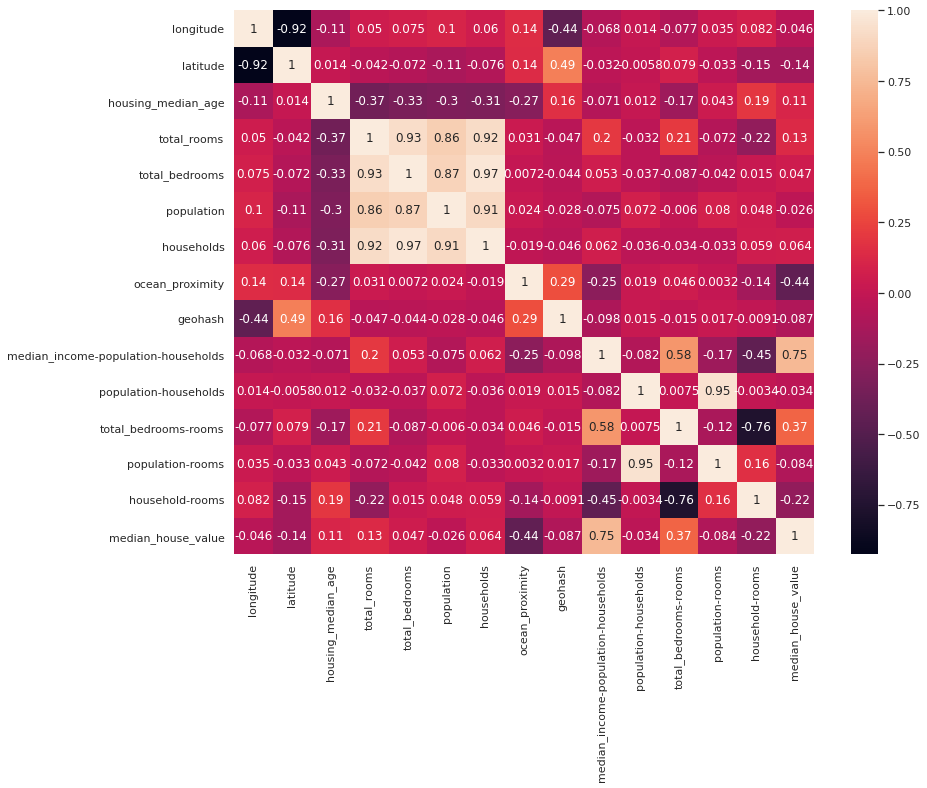

In [25]:
temp_houses = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(temp_houses.corr(), annot=True)

In [26]:
# # X_train['housing_median_age'] = X_train['housing_median_age'].apply(np.log)
# # X_train['latitude'] = X_train['latitude'].apply(np.log)
# # X_train['longitude'] = X_train['longitude'].apply(np.log)
# X_train['total_rooms'] = X_train['total_rooms'].apply(np.log)
# X_train['total_bedrooms'] = X_train['total_bedrooms'].apply(np.log)
# X_train['population'] = X_train['population'].apply(np.log)
# X_train['households'] = X_train['households'].apply(np.log)
# X_train['median_income-population-households'] = X_train['median_income-population-households'].apply(np.log)
# X_train['population-rooms'] = X_train['population-rooms'].apply(np.log)
# X_train['household-rooms'] = X_train['household-rooms'].apply(np.log)
# X_train['total_bedrooms-rooms'] = X_train['total_bedrooms-rooms'].apply(np.log)
# X_train['geohash'] = X_train['geohash'].apply(np.log)
# X_train['population-households'] = X_train['population-households'].apply(np.log)
# # # X_train['median_income'] = X_train['median_income'].apply(np.log)

# # # X_test['housing_median_age'] = X_test['housing_median_age'].apply(np.log)
# # X_train['latitude'] = X_train['latitude'].apply(np.log)
# # X_train['longitude'] = X_train['longitude'].apply(np.log)
# X_test['total_rooms'] = X_test['total_rooms'].apply(np.log)
# X_test['total_bedrooms'] = X_test['total_bedrooms'].apply(np.log)
# X_test['population'] = X_test['population'].apply(np.log)
# X_test['households'] = X_test['households'].apply(np.log)
# X_test['median_income-population-households'] = X_test['median_income-population-households'].apply(np.log)
# X_test['total_bedrooms-rooms'] = X_test['total_bedrooms-rooms'].apply(np.log)
# X_test['population-rooms'] = X_test['population-rooms'].apply(np.log)
# X_test['household-rooms'] = X_test['household-rooms'].apply(np.log)
# X_test['geohash'] = X_test['geohash'].apply(np.log)
# X_test['population-households'] = X_test['population-households'].apply(np.log)
# # population_rooms
# # X_test['median_income'] = X_test['median_income'].apply(np.log)


In [27]:
 pt = PowerTransformer(method='box-cox', standardize=False)

In [28]:
 X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'ocean_proximity',
       'geohash', 'median_income-population-households',
       'population-households', 'total_bedrooms-rooms', 'population-rooms',
       'household-rooms'],
      dtype='object')

In [29]:
# X_train['longitude'] = X_train['longitude'] * -1

In [30]:
X_train['ocean_proximity'].unique()

array([4, 2, 3, 1])

In [31]:
# for i in ['housing_median_age', 'total_rooms',
#        'total_bedrooms', 'population', 'households',
#        'geohash', 'median_income-population-households',
#        'population-households', 'total_bedrooms-rooms', 'population-rooms',
#        'household-rooms']:
#     X_train[i] = pt.fit_transform(X_train[i].values.reshape(-1, 1))

In [32]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,ocean_proximity,geohash,median_income-population-households,population-households,total_bedrooms-rooms,population-rooms,household-rooms
1316,-121.80,38.00,34.0,2738.0,475.0,1316.0,459.0,4,5590700301802850108,1.233580,2.867102,5.764211,0.480643,0.167641
14778,-117.09,32.58,12.0,2565.0,567.0,1785.0,545.0,2,5545228239277403112,0.924302,3.275229,4.523810,0.695906,0.212476
779,-122.12,37.65,26.0,162.0,27.0,86.0,25.0,2,5589891577193337154,0.690407,3.440000,6.000000,0.530864,0.154321
5225,-118.25,33.93,40.0,975.0,270.0,1068.0,270.0,3,5587481161743566623,0.250003,3.955556,3.611111,1.095385,0.276923
14838,-117.10,32.68,49.0,1412.0,350.0,1200.0,332.0,2,5545232742252313145,0.564345,3.614458,4.034286,0.849858,0.235127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4,5590854395133454530,1.357216,3.251142,5.737991,0.541857,0.166667
19648,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,4,5591518917365566854,0.941146,3.095694,5.733333,0.578712,0.186941
9845,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,2,5589567559798426622,1.785080,1.791349,3.289655,0.491964,0.274633
10799,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,3,5545436417522371029,2.505268,2.247863,4.267068,0.495059,0.220235


In [33]:
X_train = X_train.drop(columns = ['total_rooms', 'total_bedrooms'])
X_test = X_test.drop(columns = ['total_rooms', 'total_bedrooms'])

# X_train = X_train.drop(columns = ['total_rooms', 'total_bedrooms', 'latitude', 'longitude'])
# X_test = X_test.drop(columns = ['total_rooms', 'total_bedrooms', 'latitude', 'longitude'])

In [34]:
min_max = MinMaxScaler() 

X_train = min_max.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = min_max.transform(X_test)
X_test = pd.DataFrame(X_test)

In [35]:
# regr = RandomForestRegressor(n_estimators = 200,n_jobs = -1)
regr =  xgboost.XGBRegressor(subsample = 0.8, n_estimators = 600, max_depth = 8, learning_rate = 0.05, gamma = 1)
# regr = xgboost.XGBRegressor()
# regr = LinearRegression()
# regr = DecisionTreeRegressor()
# regr = svm.SVR()
# regr = MLPRegressor(random_state=1, max_iter=5000, solver = 'adam')

In [36]:
# {'subsample': 0.8,
#  'n_estimators': 300,
#  'max_depth': 8,
#  'learning_rate': 0.05,
#  'gamma': 1}

In [37]:
# para_tunning = {
#         'learning_rate': [0.01,0.05,0.1],
# #         'min_child_weight': [1, 5, 10],
#         'gamma': [0, 0.5, 1, 1.5],
#         'subsample': [0.6, 0.8, 1.0],
# #         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [ 4, 5, 6, 7, 8, 10],
# #         "n_estimators": [100 ,150, 200, 300],
#         "n_estimators": [300, 400, 500, 600, 700, 800],
# #         "alpha":[0,2,4,6,8]
#         }

In [38]:
# clf_rndcv = RandomizedSearchCV(regr, 
#                          param_distributions = para_tunning,
#                          cv = 3,  
#                          n_iter = 50,
#                          scoring = 'neg_mean_absolute_error', 
#                          error_score = 0, 
#                          verbose = 3, 
#                          n_jobs = -1,
#                          random_state = 42)

In [39]:
# y_pred = clf_rndcv.predict(X_test)
# r2_score(y_test, y_pred)

In [40]:
regr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
# clf_rndcv.best_params_
# {'subsample': 0.8,
#  'n_estimators': 600,
#  'max_depth': 8,
#  'learning_rate': 0.05,
#  'gamma': 0.5}

In [42]:
# clf_rndcv.best_params_

In [43]:
y_pred = regr.predict(X_test)

In [44]:
r2_score(y_test, y_pred)

0.8699612417784459

In [45]:
 metrics.mean_squared_error(y_test,y_pred)

1723014697.113044

In [46]:
 metrics.mean_absolute_error(y_test,y_pred)

26635.52254547198

In [47]:
residuos = y_test - y_pred

/home/victor/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

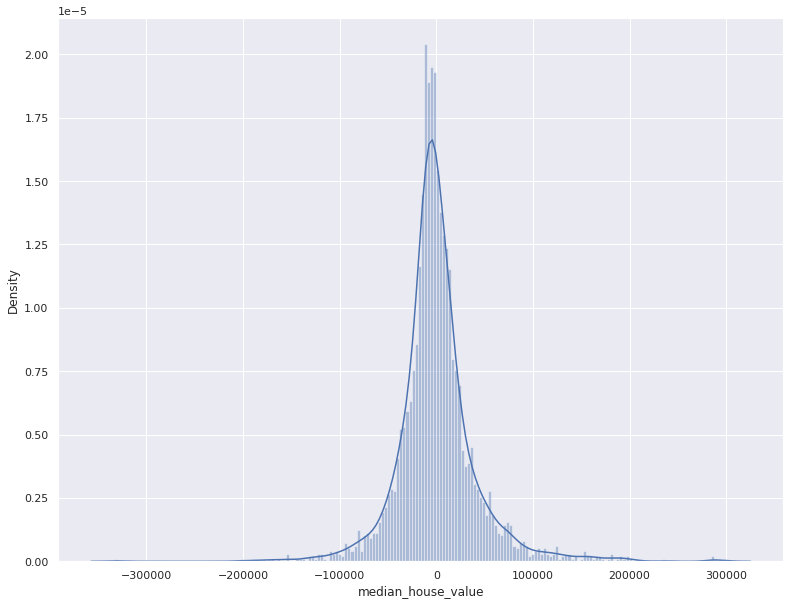

In [48]:
#Verificando se os residuos seguem uma distribuição normal 
sns.distplot(residuos,bins=200)

((array([-3.51022992, -3.26704653, -3.13259612, ...,  3.13259612,
          3.26704653,  3.51022992]),
  array([-332297.40625 , -201762.46875 , -189136.78125 , ...,
          287354.25    ,  287796.796875,  300245.515625])),
 (38985.13265848135, 665.5382461744937, 0.9383515158392479))

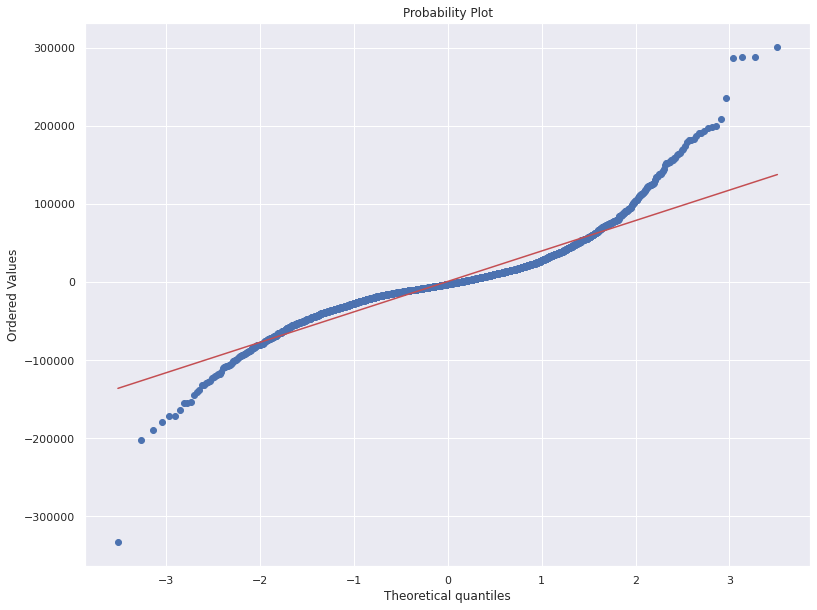

In [49]:
stats.probplot(residuos,plot=pylab)

In [50]:
stats.normaltest(residuos)

NormaltestResult(statistic=802.0960858388407, pvalue=6.715030382505501e-175)

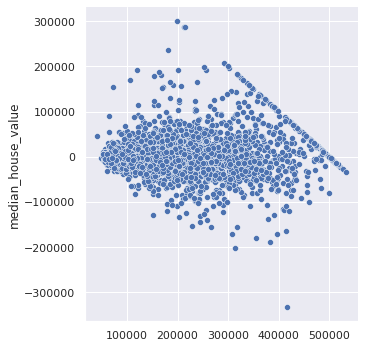

In [51]:
sns.relplot(x=y_pred, y=residuos)

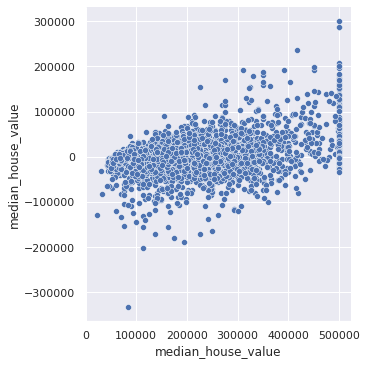

In [52]:
sns.relplot(x=y_test, y=residuos)

In [53]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.253984,0.580234,0.647059,0.036800,0.075317,1.000000,0.766970,0.164353,0.003535,0.203672,0.003967,0.136702
1,0.723108,0.004251,0.215686,0.049945,0.089459,0.333333,0.087838,0.122862,0.004216,0.156976,0.005813,0.174867
2,0.222112,0.543039,0.490196,0.002326,0.003947,0.333333,0.754892,0.091484,0.004491,0.212549,0.004398,0.125364
3,0.607570,0.147715,0.764706,0.029849,0.044236,0.666667,0.718892,0.032401,0.005352,0.122616,0.009240,0.229727
4,0.722112,0.014878,0.941176,0.033549,0.054432,0.333333,0.087905,0.074572,0.004782,0.138547,0.007134,0.194149
...,...,...,...,...,...,...,...,...,...,...,...,...
17539,0.307769,0.608927,0.372549,0.019872,0.035849,1.000000,0.769271,0.180940,0.004176,0.202685,0.004492,0.135873
17540,0.344622,0.524973,0.509804,0.018050,0.034205,1.000000,0.779196,0.125122,0.003916,0.202510,0.004808,0.153131
17541,0.244024,0.429330,0.588235,0.019647,0.064463,0.333333,0.750052,0.238340,0.001739,0.110515,0.004064,0.227777
17542,0.639442,0.114772,0.647059,0.029401,0.076797,0.666667,0.090947,0.334958,0.002501,0.147311,0.004091,0.181472


In [54]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.727092,0.004251,0.411765,0.043387,0.060845,0.333333,0.088190,0.132093,0.005728,0.184904,0.006176,0.144314
1,0.635458,0.146652,0.607843,0.036240,0.070383,0.666667,0.808477,0.255522,0.003792,0.234493,0.004087,0.133382
2,0.250000,0.649309,0.549020,0.043471,0.087650,1.000000,0.768275,0.199336,0.003606,0.204236,0.004053,0.137531
3,0.871514,0.070138,0.705882,0.010847,0.023187,1.000000,0.100612,0.118589,0.003333,0.129405,0.004563,0.164488
4,0.191235,0.557917,0.470588,0.018106,0.062161,0.333333,0.749219,0.390964,0.001607,0.143085,0.003245,0.191079
...,...,...,...,...,...,...,...,...,...,...,...,...
3091,0.247012,0.534538,0.235294,0.068416,0.135504,0.666667,0.754591,0.318991,0.003694,0.236094,0.003643,0.121246
3092,0.187251,0.547290,0.509804,0.058886,0.107877,0.333333,0.749128,0.143346,0.004094,0.114617,0.007219,0.222550
3093,0.579681,0.201913,0.352941,0.018134,0.031574,0.666667,0.719531,0.239451,0.004371,0.234750,0.004183,0.121852
3094,0.601594,0.142402,0.392157,0.019143,0.065614,0.666667,0.718604,0.185131,0.001611,0.117120,0.003793,0.222520


In [55]:
y_train

1316     122500.0
14778    135300.0
779      137500.0
5225      87500.0
14838     93600.0
           ...   
13123    144600.0
19648    159400.0
9845     289300.0
10799    484600.0
2732      69400.0
Name: median_house_value, Length: 17544, dtype: float64

In [56]:
y_test

14740    136900.0
10101    241300.0
20566    200700.0
2670      72500.0
15709    460000.0
           ...   
978      393200.0
16770    239100.0
9153     217800.0
8510     237500.0
4914     103800.0
Name: median_house_value, Length: 3096, dtype: float64

In [57]:
print(y_pred)

[132334.1  245343.53 167454.64 ... 251018.05 250773.75 111660.32]


In [58]:
pd.DataFrame(y_pred).to_csv("bugado.csv")

In [59]:
y_test[y_test == 500001]

10574    500001.0
10472    500001.0
17237    500001.0
5288     500001.0
15700    500001.0
           ...   
9370     500001.0
17234    500001.0
10805    500001.0
17306    500001.0
17171    500001.0
Name: median_house_value, Length: 148, dtype: float64

In [60]:
y_pred[y_pred == 500001]

array([], dtype=float32)